In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [6]:
iris = datasets.load_iris()

In [10]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)

In [8]:
y = pd.Series(iris.target)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [14]:
clf = DecisionTreeClassifier(max_depth=3)

In [16]:
clf = clf.fit(X_train, y_train)

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.663\nsamples = 105\nvalue = [32, 40, 33]\nclass = versicolor'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.495\nsamples = 73\nvalue = [0, 40, 33]\nclass = versicolor'),
 Text(0.25, 0.375, 'petal length (cm) <= 5.35\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.049\nsamples = 40\nvalue = [0, 39, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]\nclass = virginica')]

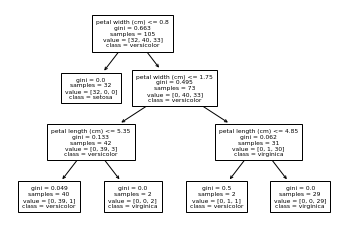

In [21]:
plot_tree(clf, feature_names = iris.feature_names, class_names = iris.target_names, fontsize = 6)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = clf.predict(X_test)

In [25]:
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [26]:
accuracy = accuracy_score(y_test, y_pred)

In [31]:
45*accuracy

42.0

In [32]:
# feature_importance inside classifier

In [33]:
feature_importance = pd.Series(clf.feature_importances_, index = iris.feature_names)

In [34]:
feature_importance 

sepal length (cm)    0.000000
sepal width (cm)     0.000000
petal length (cm)    0.068332
petal width (cm)     0.931668
dtype: float64

<AxesSubplot:>

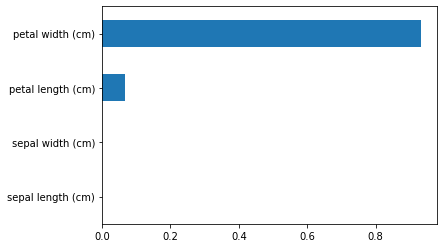

In [53]:
feature_importance.plot.barh()

In [52]:
'barh' in dir(feature_importance.plot)

True

In [54]:
# ensemble model 

In [55]:
# voting 

In [58]:
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression

In [59]:
cancer = datasets.load_breast_cancer()

In [60]:
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [62]:
y = pd.Series(cancer.target)

In [63]:
# train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 51)

In [65]:
# logistic Regression Classifier

In [66]:
lr_clf = LogisticRegression(solver='liblinear')

In [67]:
dt_clf = DecisionTreeClassifier(max_depth = 3)

In [71]:
voting_clf = VotingClassifier(estimators = [('lr', lr_clf),('dt', dt_clf)], voting = 'hard') #using lr_clf, dt_clf
# hard := majoirity Voting

In [73]:
for clf in (lr_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    

LogisticRegression 0.9370629370629371
DecisionTreeClassifier 0.9300699300699301
VotingClassifier 0.9440559440559441


In [74]:
# Conclusion : Combination is better

In [78]:
# Ensemble model : bagging

In [79]:
from sklearn.ensemble import BaggingClassifier

In [82]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, bootstrap = True, n_jobs = -1)

In [84]:
iris = datasets.load_iris()

In [86]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)

In [87]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [88]:
y = pd.Series(iris.target)

In [89]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [91]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [93]:
y_pred = bag_clf.predict(X_test)

In [94]:
accuracy = accuracy_score(y_test, y_pred)

In [95]:
accuracy

0.9555555555555556

In [96]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [97]:
rf_clf = RFC(n_estimators = 500, max_leaf_nodes=16, n_jobs = -1, random_state = 100)

In [98]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=100)

In [100]:
y_pred_rf = rf_clf.predict(X_test)

In [103]:
accuracy_score(y_test, y_pred_rf)

0.9555555555555556

In [104]:
# last one is boosting

In [105]:
from sklearn.ensemble import AdaBoostClassifier as ABC # among the Boosting, Ada Boost

In [107]:
abc_clf = ABC(DecisionTreeClassifier(max_depth=2),n_estimators = 200)

In [108]:
abc_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=200)

In [109]:
y_pred_ada = abc_clf.predict(X_test)

In [110]:
accuracy_score(y_test, y_pred_ada)

0.9333333333333333

In [111]:
# Feature encoding 

In [114]:
tips = pd.read_csv('tips.csv')

In [115]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [118]:
tips.describe(include=object ) # include non-numeric values

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [119]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [120]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [121]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [122]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [123]:
# feature_encoding non-numeric value

In [124]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [125]:
le = LabelEncoder()

In [126]:
le.fit(tips['smoker']) # why smokers를 label?

LabelEncoder()

In [127]:
le.transform(tips['smoker'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0])

In [128]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [129]:
le.fit(tips['day'])

LabelEncoder()

In [130]:
le.transform(tips['day'])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [133]:
le.classes_ # day 0 1 2 3 

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [134]:
ohe = OneHotEncoder()

In [135]:
ohe.fit(np.array(tips['day']).reshape(-1,1))

OneHotEncoder()

In [136]:
# why transform?

In [140]:
ohe.transform(np.array(tips['day']).reshape(-1,1))

<244x4 sparse matrix of type '<class 'numpy.float64'>'
	with 244 stored elements in Compressed Sparse Row format>

In [143]:
print(np.array(tips['day']).reshape(-1,1).shape)

(244, 1)


In [146]:
ohe.transform(np.array(tips['day']).reshape(-1,1)).toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [147]:
ohe_day = pd.get_dummies(tips['day'])

In [148]:
ohe_day

,Fri,Sat,Sun,Thur
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
239,0,1,0,0
240,0,1,0,0
241,0,1,0,0
242,0,1,0,0


In [149]:
le.fit(tips['smoker'])

LabelEncoder()

In [150]:
tips['smoker'] = le.transform(tips['smoker'])

In [152]:
le.fit(tips['time'])

LabelEncoder()

In [153]:
tips['time'] = le.transform(tips['time'])

In [154]:
tips = pd.concat([tips, ohe_day], axis = 1 ) # columize 

In [156]:
tips.drop('day', axis = 1, inplace = True)

In [157]:
tips.head()

,total_bill,tip,sex,smoker,time,size,Fri,Sat,Sun,Thur
0,16.99,1.01,Female,0,0,2,0,0,1,0
1,10.34,1.66,Male,0,0,3,0,0,1,0
2,21.01,3.50,Male,0,0,3,0,0,1,0
3,23.68,3.31,Male,0,0,2,0,0,1,0
4,24.59,3.61,Female,0,0,4,0,0,1,0


In [158]:
tips.drop('sex', axis = 1, inplace = True)

In [159]:
tips

,total_bill,tip,smoker,time,size,Fri,Sat,Sun,Thur
0,16.99,1.01,0,0,2,0,0,1,0
1,10.34,1.66,0,0,3,0,0,1,0
2,21.01,3.50,0,0,3,0,0,1,0
3,23.68,3.31,0,0,2,0,0,1,0
4,24.59,3.61,0,0,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,3,0,1,0,0
240,27.18,2.00,1,0,2,0,1,0,0
241,22.67,2.00,1,0,2,0,1,0,0
242,17.82,1.75,0,0,2,0,1,0,0


In [160]:
# support vector machine

In [161]:
from sklearn import svm

In [163]:
cancer = datasets.load_breast_cancer()

In [166]:
X = pd.DataFrame(cancer.data, columns = cancer.feature_names )

In [169]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [170]:
y = pd.Series(cancer.target)

In [172]:
y.shape

(569,)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [174]:
y_test.shape

(171,)

In [176]:
clf = svm.SVC(kernel = 'linear')

In [177]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [178]:
y_pred = clf.predict(X_test)

In [179]:
accuracy_score(y_test, y_pred)

0.9707602339181286

In [204]:
iris = datasets.load_iris()

In [221]:
print(y.shape)

(100,)


In [222]:
y = iris.target

In [223]:
X = iris.data[y != 0, : 2]

In [226]:
X

array([[7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.5, 2.3],
       [6.5, 2.8],
       [5.7, 2.8],
       [6.3, 3.3],
       [4.9, 2.4],
       [6.6, 2.9],
       [5.2, 2.7],
       [5. , 2. ],
       [5.9, 3. ],
       [6. , 2.2],
       [6.1, 2.9],
       [5.6, 2.9],
       [6.7, 3.1],
       [5.6, 3. ],
       [5.8, 2.7],
       [6.2, 2.2],
       [5.6, 2.5],
       [5.9, 3.2],
       [6.1, 2.8],
       [6.3, 2.5],
       [6.1, 2.8],
       [6.4, 2.9],
       [6.6, 3. ],
       [6.8, 2.8],
       [6.7, 3. ],
       [6. , 2.9],
       [5.7, 2.6],
       [5.5, 2.4],
       [5.5, 2.4],
       [5.8, 2.7],
       [6. , 2.7],
       [5.4, 3. ],
       [6. , 3.4],
       [6.7, 3.1],
       [6.3, 2.3],
       [5.6, 3. ],
       [5.5, 2.5],
       [5.5, 2.6],
       [6.1, 3. ],
       [5.8, 2.6],
       [5. , 2.3],
       [5.6, 2.7],
       [5.7, 3. ],
       [5.7, 2.9],
       [6.2, 2.9],
       [5.1, 2.5],
       [5.7, 2.8],
       [6.3, 3.3],
       [5.8, 2.7],
       [7.1,

In [227]:
X.shape

(100, 2)

In [224]:

y = y[y!=0]

In [225]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [228]:
y.shape

(100,)

In [187]:
C = 0.1 * np.arange(1,11)

In [188]:
C

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [189]:
h = 0.02

In [248]:
x_min, x_max = X[:,0].min() -1, X[:, 0].max() + 1
y_min, y_max = (X[:,1].min() -1), X[:, 1].max() + 1

2.2

In [249]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
yy

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
       [1.04, 1.04, 1.04, ..., 1.04, 1.04, 1.04],
       ...,
       [4.74, 4.74, 4.74, ..., 4.74, 4.74, 4.74],
       [4.76, 4.76, 4.76, ..., 4.76, 4.76, 4.76],
       [4.78, 4.78, 4.78, ..., 4.78, 4.78, 4.78]])

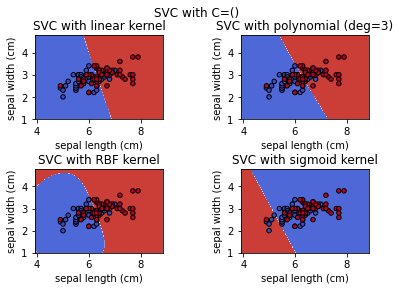

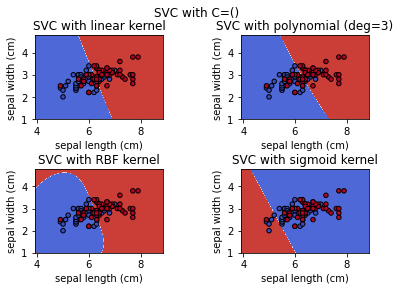

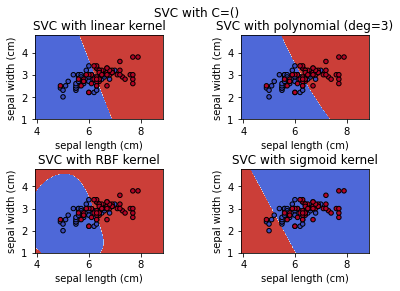

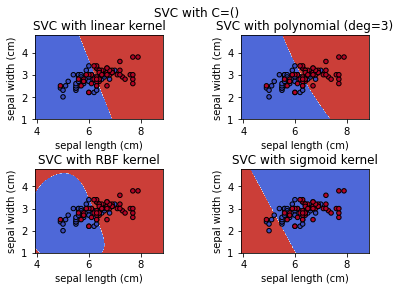

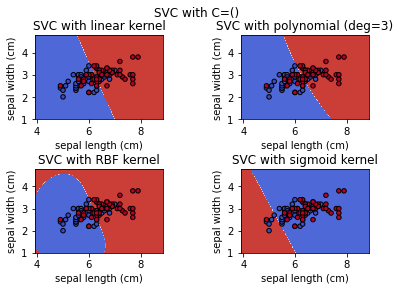

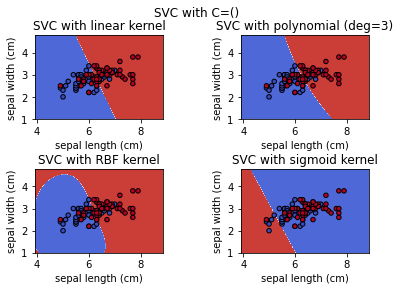

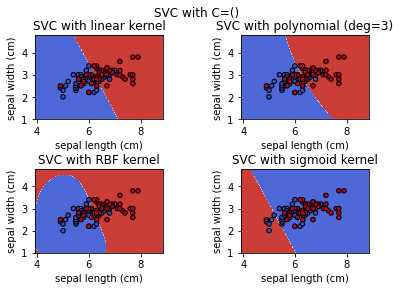

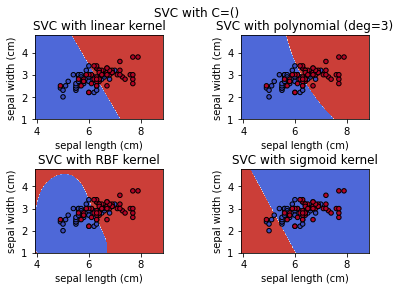

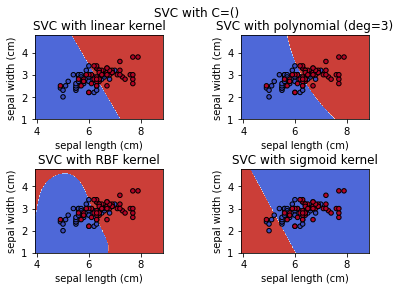

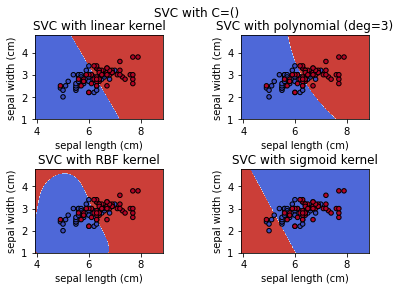

In [250]:
# consider SVM classifier 
for c in C:
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.6, hspace = 0.6)
    svm_linear = svm.SVC(kernel='linear', C=c)
    svm_poly = svm.SVC(kernel = 'poly', degree = 3, gamma = 'scale', C=c)
    svm_rbf = svm.SVC(kernel = 'rbf', gamma = 0.7, C=c)
    svm_sigmoid = svm.SVC(kernel = 'sigmoid', gamma = 'scale', C=c)
    models = [svm_linear, svm_poly, svm_rbf, svm_sigmoid]
    titles = ['SVC with linear kernel','SVC with polynomial (deg=3)',
             'SVC with RBF kernel', 'SVC with sigmoid kernel']
    axes = sub.flatten()
    fig.suptitle('SVC with C=()'.format(c))
    for clf, title, ax in zip(models, titles, axes):
        clf = clf.fit(X,y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, z, cmap=plt.cm.coolwarm)
        ax.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.coolwarm, s=20, edgecolor = 'k')
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title(title)
        
# rbf ?? 
# radial basis